In [527]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [528]:
dataset=pd.read_csv("train.csv")

In [529]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [530]:
dataset.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [531]:
dataset.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

## Handling Missing values

In [532]:
dataset.isnull().sum().sum()

6965

In [533]:
def show_missing ():
    missing=dataset.columns[dataset.isnull().any()].tolist()
    return missing

In [534]:
dataset[show_missing()].isnull().sum()

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [535]:
# Highest Null values 
dataset.drop(['Alley','PoolQC','Fence','MiscFeature'],axis=1,inplace=True)

In [536]:
dataset[show_missing()].isnull().sum()

LotFrontage     259
MasVnrType        8
MasVnrArea        8
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Electrical        1
FireplaceQu     690
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
GarageCond       81
dtype: int64

In [537]:
dataset['BsmtCond']=dataset['BsmtCond'].fillna(dataset.BsmtCond.mode()[0])

In [538]:
dataset[show_missing()].isnull().sum()

LotFrontage     259
MasVnrType        8
MasVnrArea        8
BsmtQual         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Electrical        1
FireplaceQu     690
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
GarageCond       81
dtype: int64

In [539]:

dr1=['LotFrontage','BsmtQual','MasVnrType','MasVnrArea','BsmtExposure','BsmtFinType1','BsmtFinType2','Electrical','GarageType','GarageYrBlt',      
'GarageFinish','GarageQual', 'GarageCond']

In [540]:
for column in dr1 :
    dataset[column]=dataset[column].fillna(dataset[column].mode()[0])

In [541]:
dataset.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 77, dtype: int64

In [542]:
# We don't need the Id column in dataset
dataset.drop(columns=['Id'],inplace=True)

In [543]:
dataset=pd.get_dummies(dataset,drop_first=True)

In [544]:
dataset

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0             60         65.0     8450            7            5       2003   
1             20         80.0     9600            6            8       1976   
2             60         68.0    11250            7            5       2001   
3             70         60.0     9550            7            5       1915   
4             60         84.0    14260            8            5       2000   
...          ...          ...      ...          ...          ...        ...   
1455          60         62.0     7917            6            5       1999   
1456          20         85.0    13175            6            6       1978   
1457          70         66.0     9042            7            9       1941   
1458          20         68.0     9717            5            6       1950   
1459          20         75.0     9937            5            6       1965   

      YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  SaleType_ConLI  \
0             2003       196.0         706           0  ...               0   
1             1976         0.0         978           0  ...               0   
2             2002       162.0         486           0  ...               0   
3             1970         0.0         216           0  ...               0   
4             2000       350.0         655           0  ...               0   
...            ...         ...         ...         ...  ...             ...   
1455          2000         0.0           0           0  ...               0   
1456          1988       119.0         790         163  ...               0   
1457          2006         0.0         275           0  ...               0   
1458          1996         0.0          49        1029  ...               0   
1459          1965         0.0         830         290  ...               0   

      SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
0                  0             0             0            1   
1                  0             0             0            1   
2                  0             0             0            1   
3                  0             0             0            1   
4                  0             0             0            1   
...              ...           ...           ...          ...   
1455               0             0             0            1   
1456               0             0             0            1   
1457               0             0             0            1   
1458               0             0             0            1   
1459               0             0             0            1   

      SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
0                         0                     0                     0   
1                         0                     0                     0   
2                         0                     0                     0   
3                         0                     0                     0   
4                         0                     0                     0   
...                     ...                   ...                   ...   
1455                      0                     0                     0   
1456                      0                     0                     0   
1457                      0                     0                     0   
1458                      0                     0                     0   
1459                      0                     0                     0   

      SaleCondition_Normal  SaleCondition_Partial  
0                        1                      0  
1                        1                      0  
2                        1                      0  
3                        0                      0  
4                        1                      0  
...                    ...                    ...  
1455                     1                      0  
1456      

In [545]:
datasetX=dataset.copy()

In [546]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 237 entries, MSSubClass to SaleCondition_Partial
dtypes: float64(3), int64(34), uint8(200)
memory usage: 707.3 KB


# Handling outliers

In [547]:
import seaborn as sns
%pylab inline

Populating the interactive namespace from numpy and matplotlib


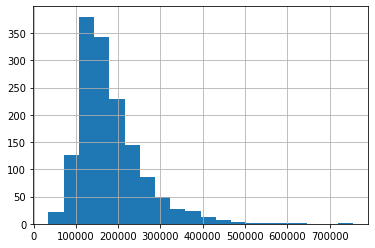

In [548]:
dataset.SalePrice.hist(bins=20)

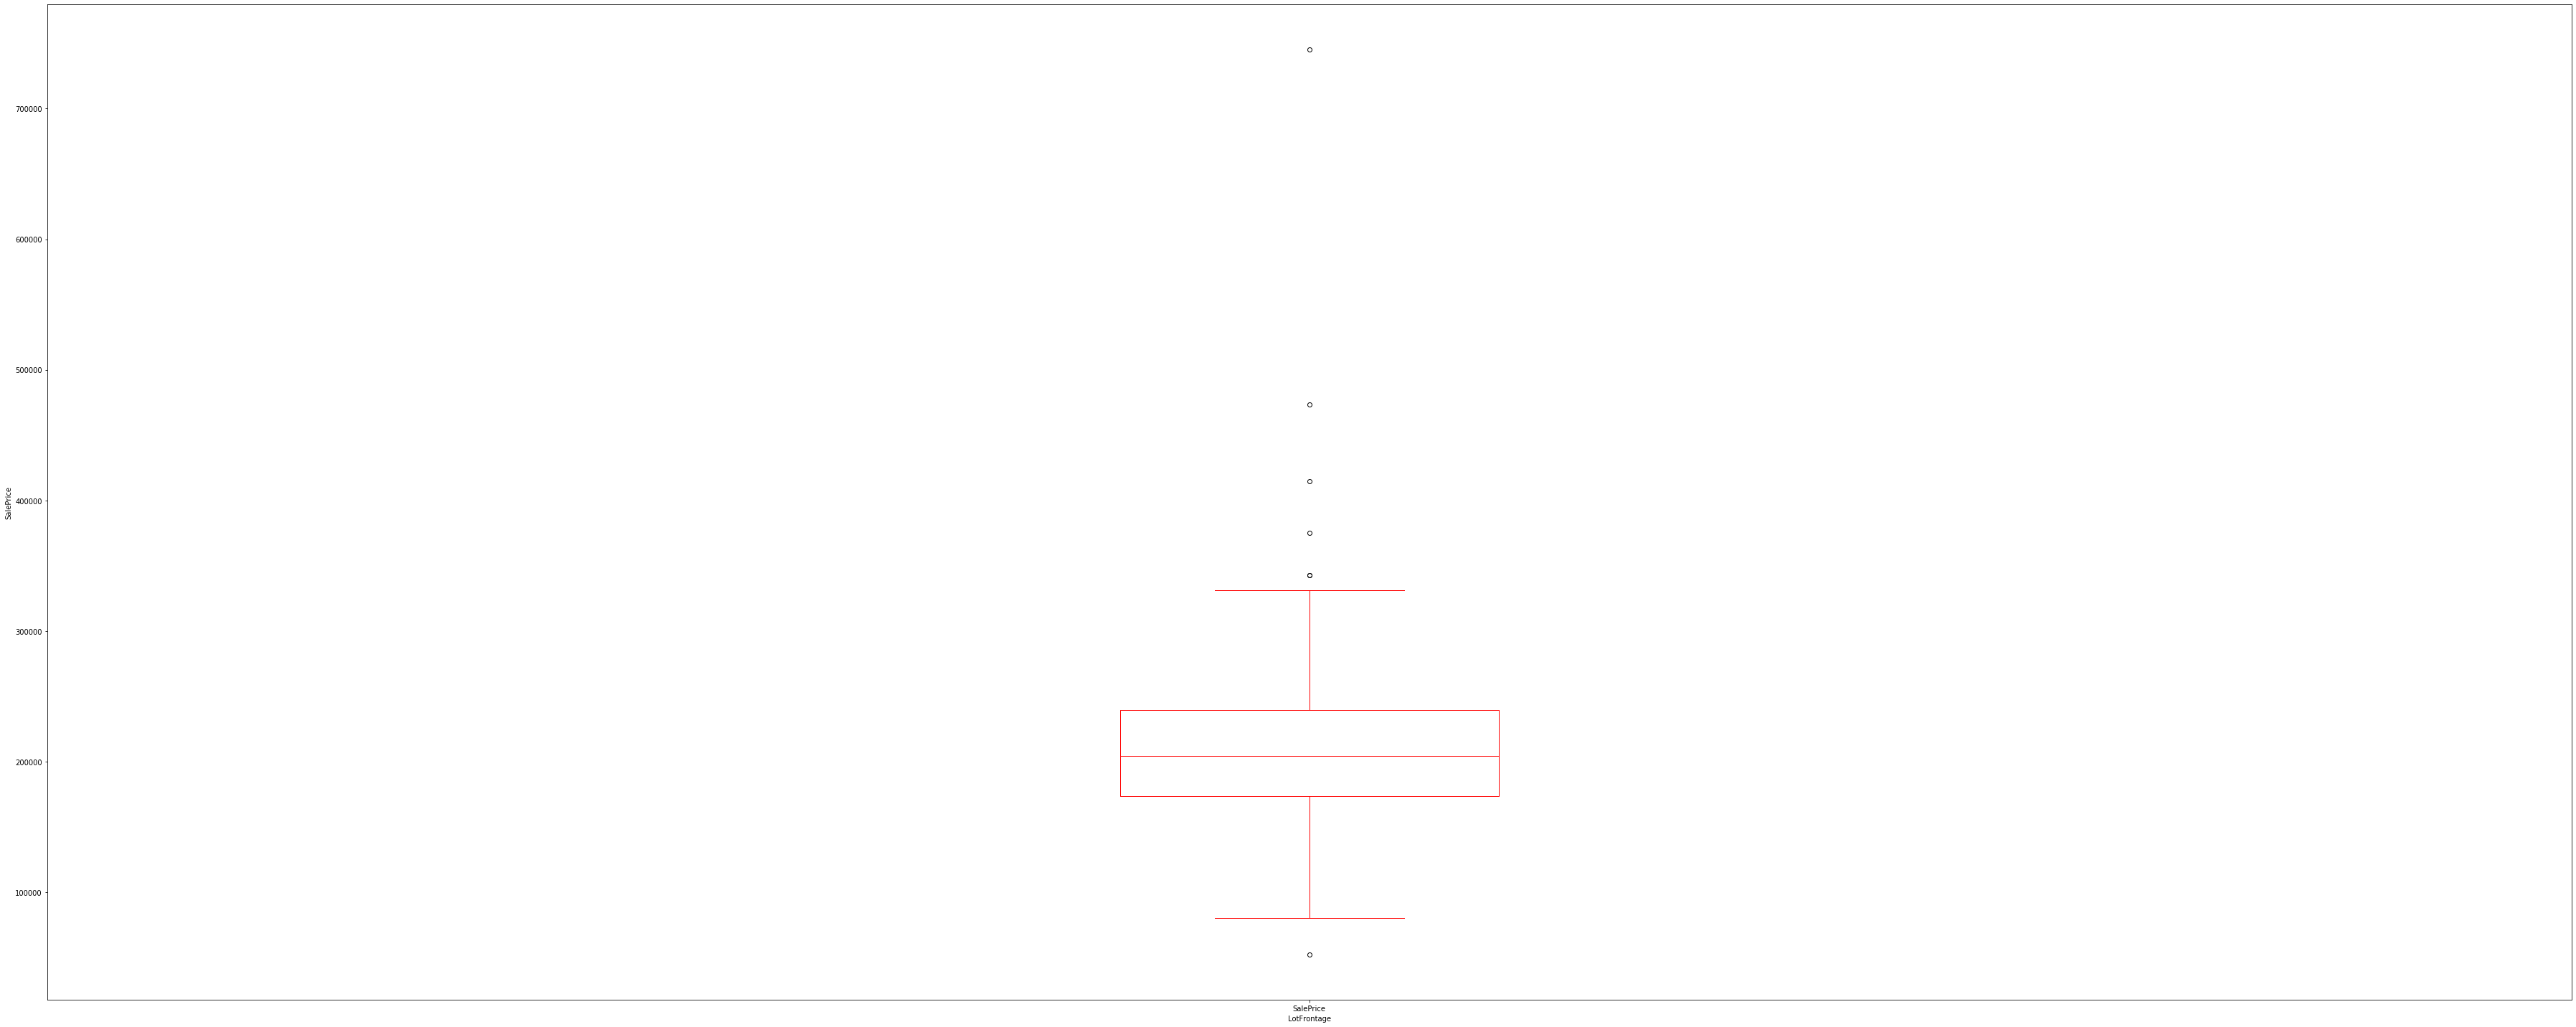

In [621]:
# Trying to plot a graph
plt.figure(figsize=(50,20))
#sns.boxplot(dataset.LotFrontage,dataset.SalePrice)
DF=dataset.groupby(['LotFrontage'])['SalePrice'].mean()
DF.plot.box(color = 'red')
plt.xlabel("LotFrontage")
plt.ylabel("SalePrice")
plt.tight_layout()

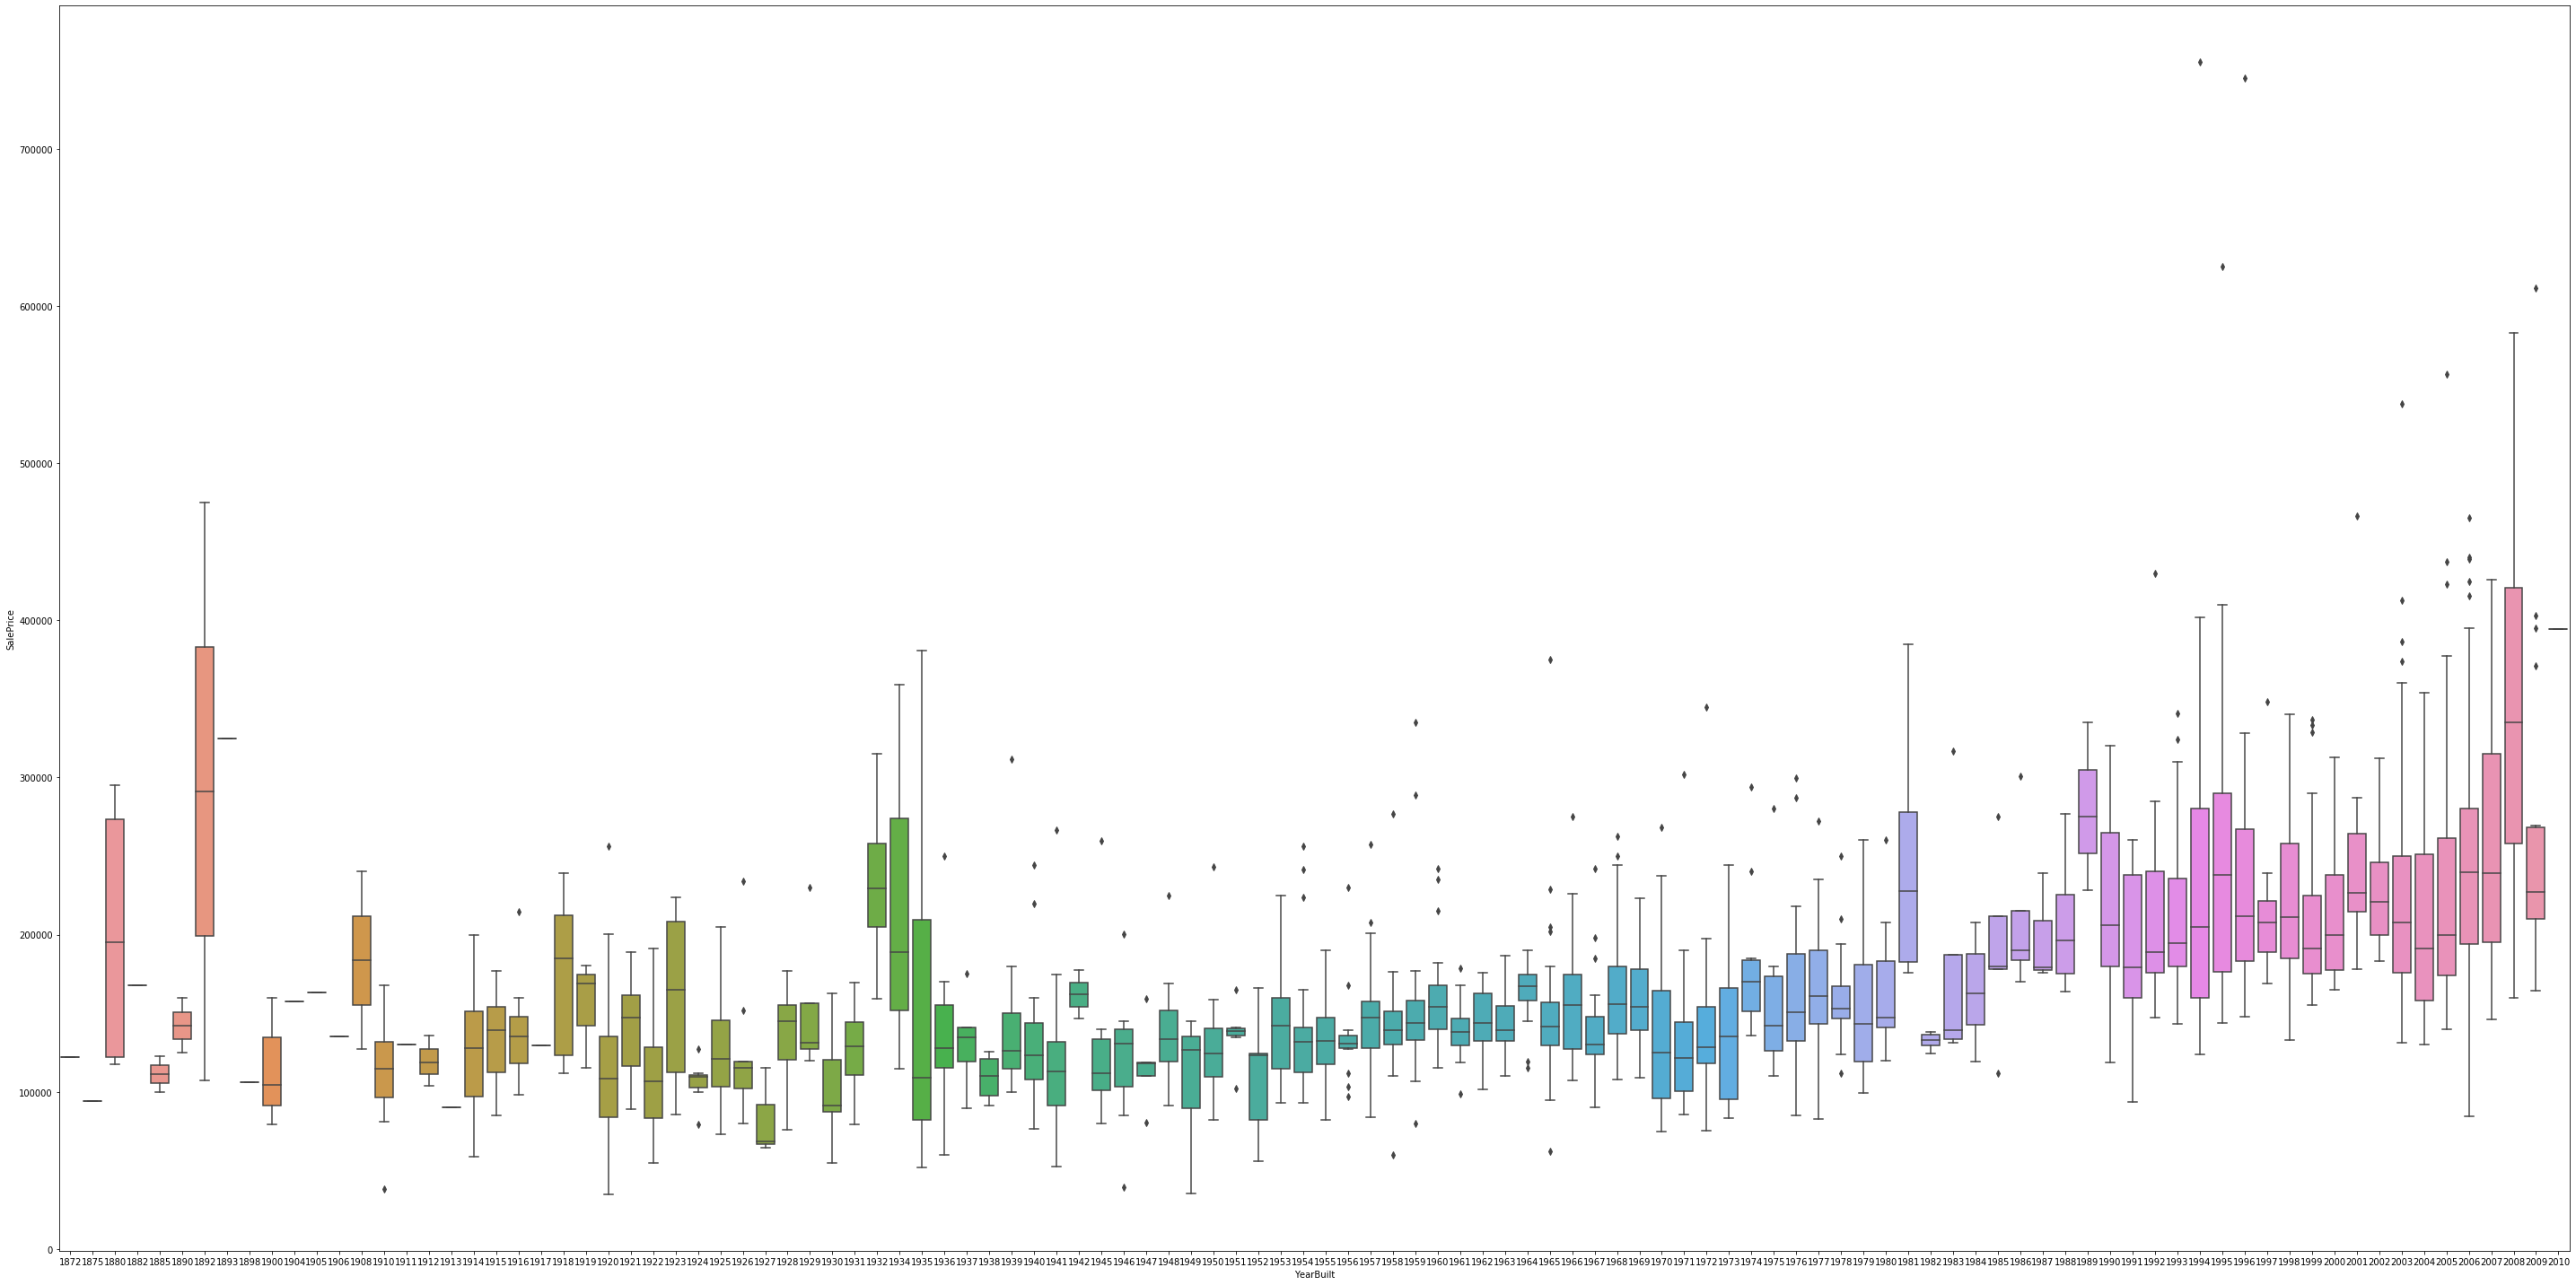

In [613]:
plt.figure(figsize=(40,20))
sns.boxplot(dataset.YearBuilt,dataset.SalePrice)
plt.tight_layout()

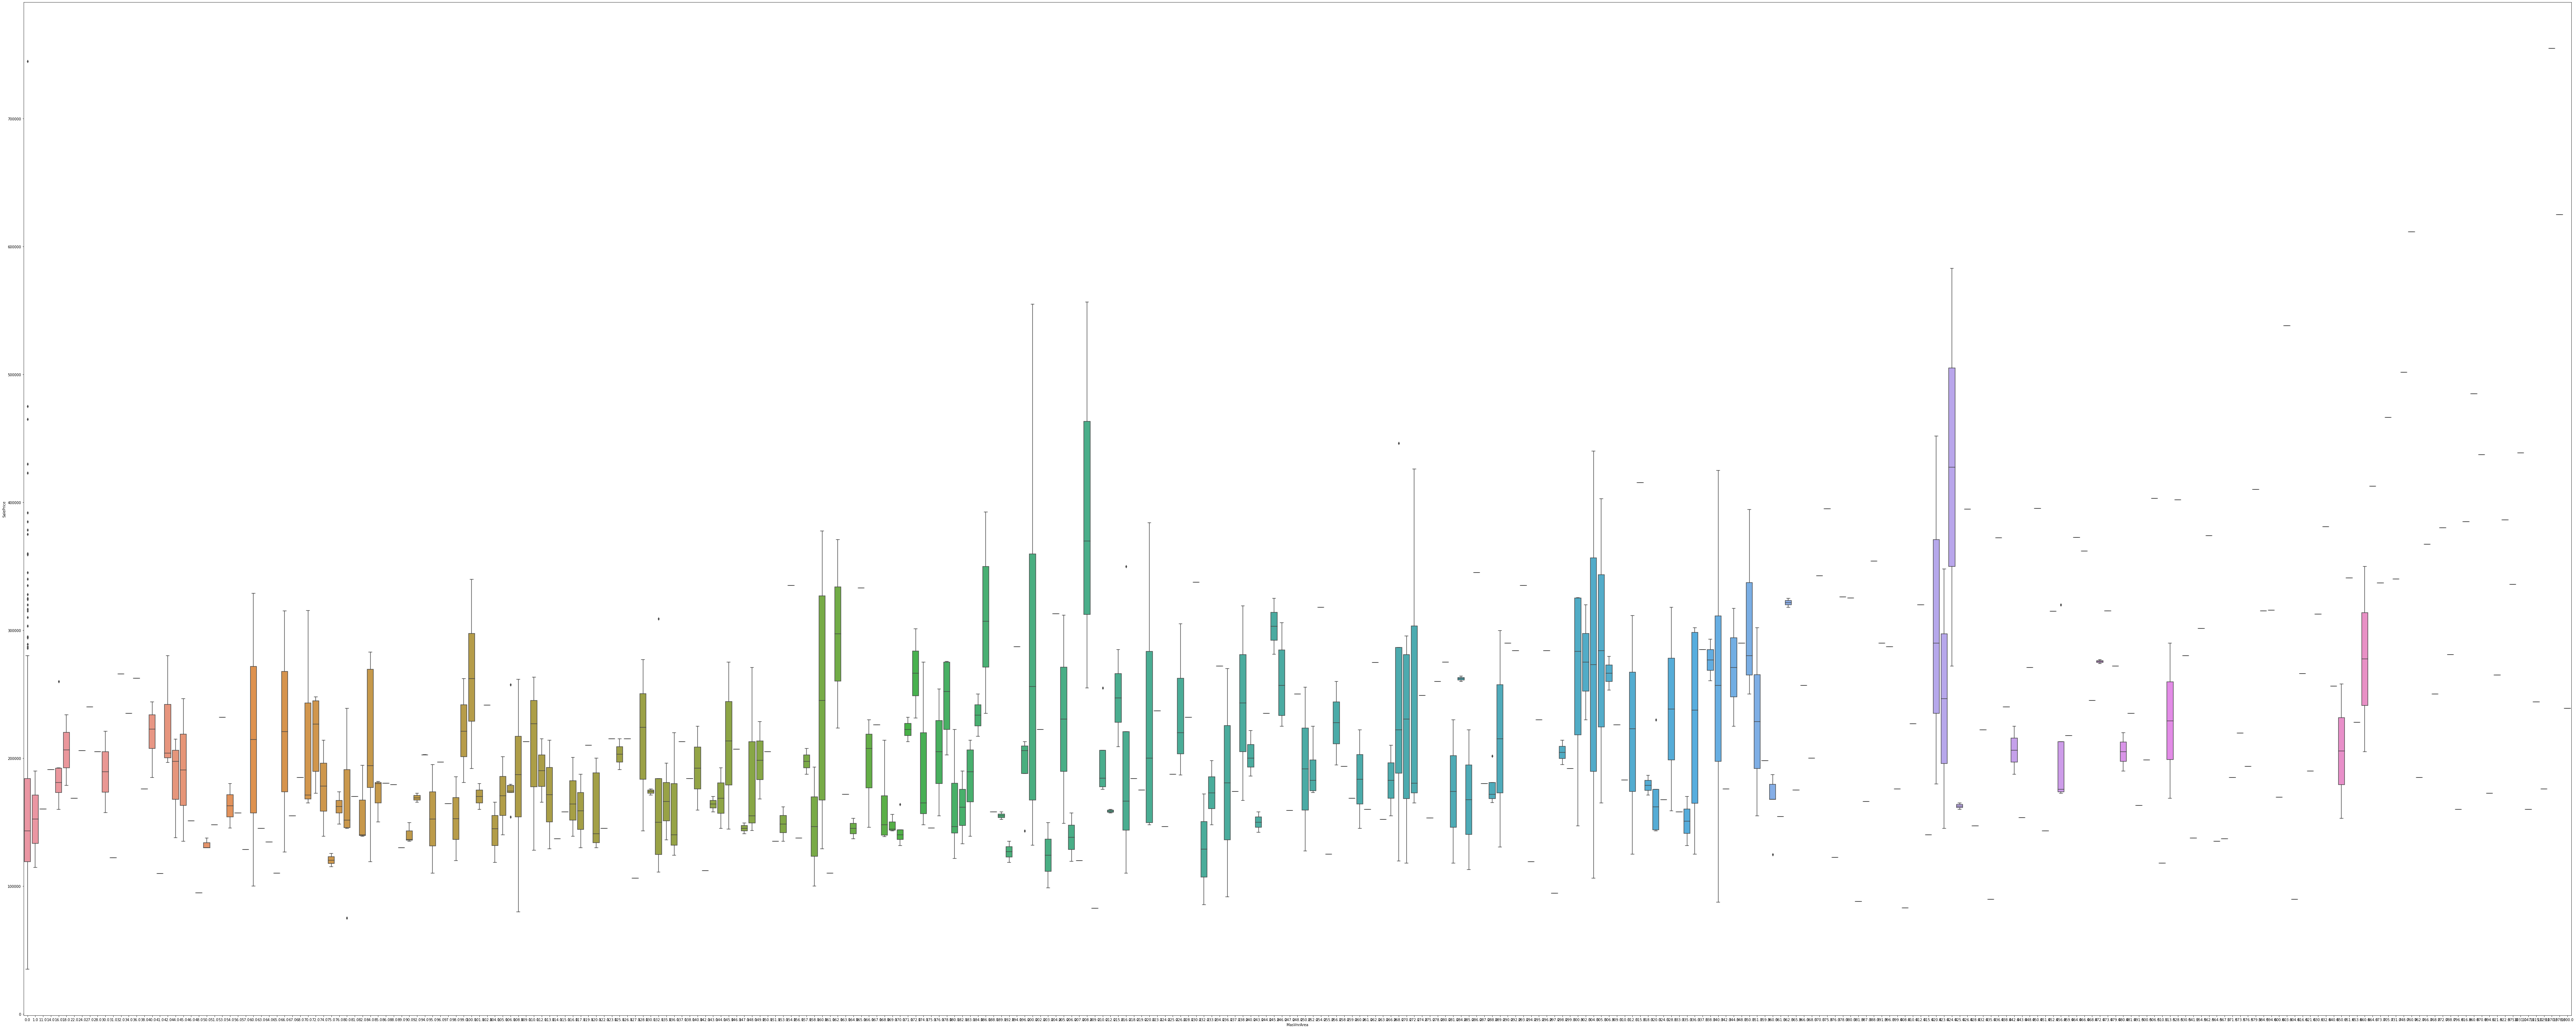

In [614]:
plt.figure(figsize=(100,40))
sns.boxplot(dataset.MasVnrArea,dataset.SalePrice)
plt.tight_layout()

In [552]:
from scipy import stats
pd.DataFrame(stats.zscore(dataset))

0         1         2         3         4         5         6    \
0     0.073375 -0.146189 -0.207142  0.651479 -0.517200  1.050994  0.878668   
1    -0.872563  0.524992 -0.091886 -0.071836  2.179628  0.156734 -0.429577   
2     0.073375 -0.011953  0.073480  0.651479 -0.517200  0.984752  0.830215   
3     0.309859 -0.369915 -0.096897  0.651479 -0.517200 -1.863632 -0.720298   
4     0.073375  0.703973  0.375148  1.374795 -0.517200  0.951632  0.733308   
...        ...       ...       ...       ...       ...       ...       ...   
1455  0.073375 -0.280425 -0.260560 -0.071836 -0.517200  0.918511  0.733308   
1456 -0.872563  0.748718  0.266407 -0.071836  0.381743  0.222975  0.151865   
1457  0.309859 -0.101443 -0.147810  0.651479  3.078570 -1.002492  1.024029   
1458 -0.872563 -0.011953 -0.080160 -0.795151  0.381743 -0.704406  0.539493   
1459 -0.872563  0.301265 -0.058112 -0.795151  0.381743 -0.207594 -0.962566   

           7         8         9    ...       227       228       229  \
0     0.514104  0.575425 -0.288653  ... -0.058621 -0.058621 -0.301962   
1    -0.570750  1.171992 -0.288653  ... -0.058621 -0.058621 -0.301962   
2     0.325915  0.092907 -0.288653  ... -0.058621 -0.058621 -0.301962   
3    -0.570750 -0.499274 -0.288653  ... -0.058621 -0.058621 -0.301962   
4     1.366489  0.463568 -0.288653  ... -0.058621 -0.058621 -0.301962   
...        ...       ...       ...  ...       ...       ...       ...   
1455 -0.570750 -0.973018 -0.288653  ... -0.058621 -0.058621 -0.301962   
1456  0.087911  0.759659  0.722112  ... -0.058621 -0.058621 -0.301962   
1457 -0.570750 -0.369871 -0.288653  ... -0.058621 -0.058621 -0.301962   
1458 -0.570750 -0.865548  6.092188  ... -0.058621 -0.058621 -0.301962   
1459 -0.570750  0.847389  1.509640  ... -0.058621 -0.058621 -0.301962   

           230       231       232       233       234       235       236  
0    -0.045376  0.390293 -0.052414 -0.091035 -0.117851  0.467651 -0.305995  
1    -0.045376  0.390293 -0.052414 -0.091035 -0.117851  0.467651 -0.305995  
2    -0.045376  0.390293 -0.052414 -0.091035 -0.117851  0.467651 -0.305995  
3    -0.045376  0.390293 -0.052414 -0.091035 -0.117851 -2.138345 -0.305995  
4    -0.045376  0.390293 -0.052414 -0.091035 -0.117851  0.467651 -0.305995  
...        ...       ...       ...       ...       ...       ...       ...  
1455 -0.045376  0.390293 -0.052414 -0.091035 -0.117851  0.467651 -0.305995  
1456 -0.045376  0.390293 -0.052414 -0.091035 -0.117851  0.467651 -0.305995  
1457 -0.045376  0.390293 -0.052414 -0.091035 -0.117851  0.467651 -0.305995  
1458 -0.045376  0.390293 -0.052414 -0.091035 -0.117851  0.467651 -0.305995  
1459 -0.045376  0.390293 -0.052414 -0.091035 -0.117851  0.467651 -0.305995  

[1460 rows x 237 columns]

In [553]:
zscoreData = np.abs(stats.zscore(dataset))


In [554]:
dataset[(zscoreData > 3).all(axis = 1)]


Empty DataFrame
Columns: [MSSubClass, LotFrontage, LotArea, OverallQual, OverallCond, YearBuilt, YearRemodAdd, MasVnrArea, BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, TotRmsAbvGrd, Fireplaces, GarageYrBlt, GarageCars, GarageArea, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal, MoSold, YrSold, SalePrice, MSZoning_FV, MSZoning_RH, MSZoning_RL, MSZoning_RM, Street_Pave, LotShape_IR2, LotShape_IR3, LotShape_Reg, LandContour_HLS, LandContour_Low, LandContour_Lvl, Utilities_NoSeWa, LotConfig_CulDSac, LotConfig_FR2, LotConfig_FR3, LotConfig_Inside, LandSlope_Mod, LandSlope_Sev, Neighborhood_Blueste, Neighborhood_BrDale, Neighborhood_BrkSide, Neighborhood_ClearCr, Neighborhood_CollgCr, Neighborhood_Crawfor, Neighborhood_Edwards, Neighborhood_Gilbert, Neighborhood_IDOTRR, Neighborhood_MeadowV, Neighborhood_Mitchel, Neighborhood_NAmes, Neighborhood_NPkVill, Neighborhood_NWAmes, Neighborhood_NoRidge, Neighborhood_NridgHt, Neighborhood_OldTown, Neighborhood_SWISU, Neighborhood_Sawyer, Neighborhood_SawyerW, Neighborhood_Somerst, Neighborhood_StoneBr, Neighborhood_Timber, Neighborhood_Veenker, Condition1_Feedr, Condition1_Norm, Condition1_PosA, Condition1_PosN, Condition1_RRAe, Condition1_RRAn, Condition1_RRNe, Condition1_RRNn, Condition2_Feedr, Condition2_Norm, Condition2_PosA, Condition2_PosN, Condition2_RRAe, Condition2_RRAn, Condition2_RRNn, BldgType_2fmCon, BldgType_Duplex, BldgType_Twnhs, BldgType_TwnhsE, HouseStyle_1.5Unf, HouseStyle_1Story, ...]
Index: []

[0 rows x 237 columns]

In [555]:
dataset[(zscoreData < 0.3).all(axis = 1)]

Empty DataFrame
Columns: [MSSubClass, LotFrontage, LotArea, OverallQual, OverallCond, YearBuilt, YearRemodAdd, MasVnrArea, BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, TotRmsAbvGrd, Fireplaces, GarageYrBlt, GarageCars, GarageArea, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal, MoSold, YrSold, SalePrice, MSZoning_FV, MSZoning_RH, MSZoning_RL, MSZoning_RM, Street_Pave, LotShape_IR2, LotShape_IR3, LotShape_Reg, LandContour_HLS, LandContour_Low, LandContour_Lvl, Utilities_NoSeWa, LotConfig_CulDSac, LotConfig_FR2, LotConfig_FR3, LotConfig_Inside, LandSlope_Mod, LandSlope_Sev, Neighborhood_Blueste, Neighborhood_BrDale, Neighborhood_BrkSide, Neighborhood_ClearCr, Neighborhood_CollgCr, Neighborhood_Crawfor, Neighborhood_Edwards, Neighborhood_Gilbert, Neighborhood_IDOTRR, Neighborhood_MeadowV, Neighborhood_Mitchel, Neighborhood_NAmes, Neighborhood_NPkVill, Neighborhood_NWAmes, Neighborhood_NoRidge, Neighborhood_NridgHt, Neighborhood_OldTown, Neighborhood_SWISU, Neighborhood_Sawyer, Neighborhood_SawyerW, Neighborhood_Somerst, Neighborhood_StoneBr, Neighborhood_Timber, Neighborhood_Veenker, Condition1_Feedr, Condition1_Norm, Condition1_PosA, Condition1_PosN, Condition1_RRAe, Condition1_RRAn, Condition1_RRNe, Condition1_RRNn, Condition2_Feedr, Condition2_Norm, Condition2_PosA, Condition2_PosN, Condition2_RRAe, Condition2_RRAn, Condition2_RRNn, BldgType_2fmCon, BldgType_Duplex, BldgType_Twnhs, BldgType_TwnhsE, HouseStyle_1.5Unf, HouseStyle_1Story, ...]
Index: []

[0 rows x 237 columns]

In [556]:
Q1 = dataset.quantile(0.25)

In [557]:
Q3 = dataset.quantile(0.75)

In [558]:
IQR = Q3-Q1
IQR

MSSubClass                 50.0
LotFrontage                19.0
LotArea                  4048.0
OverallQual                 2.0
OverallCond                 1.0
                          ...  
SaleCondition_AdjLand       0.0
SaleCondition_Alloca        0.0
SaleCondition_Family        0.0
SaleCondition_Normal        0.0
SaleCondition_Partial       0.0
Length: 237, dtype: float64

In [559]:
dataset[~( (dataset < (Q1  - 1.5 * IQR) ) | (dataset > (Q3 - 1.5 * IQR) ) ).any(axis = 1)]


Empty DataFrame
Columns: [MSSubClass, LotFrontage, LotArea, OverallQual, OverallCond, YearBuilt, YearRemodAdd, MasVnrArea, BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, TotRmsAbvGrd, Fireplaces, GarageYrBlt, GarageCars, GarageArea, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal, MoSold, YrSold, SalePrice, MSZoning_FV, MSZoning_RH, MSZoning_RL, MSZoning_RM, Street_Pave, LotShape_IR2, LotShape_IR3, LotShape_Reg, LandContour_HLS, LandContour_Low, LandContour_Lvl, Utilities_NoSeWa, LotConfig_CulDSac, LotConfig_FR2, LotConfig_FR3, LotConfig_Inside, LandSlope_Mod, LandSlope_Sev, Neighborhood_Blueste, Neighborhood_BrDale, Neighborhood_BrkSide, Neighborhood_ClearCr, Neighborhood_CollgCr, Neighborhood_Crawfor, Neighborhood_Edwards, Neighborhood_Gilbert, Neighborhood_IDOTRR, Neighborhood_MeadowV, Neighborhood_Mitchel, Neighborhood_NAmes, Neighborhood_NPkVill, Neighborhood_NWAmes, Neighborhood_NoRidge, Neighborhood_NridgHt, Neighborhood_OldTown, Neighborhood_SWISU, Neighborhood_Sawyer, Neighborhood_SawyerW, Neighborhood_Somerst, Neighborhood_StoneBr, Neighborhood_Timber, Neighborhood_Veenker, Condition1_Feedr, Condition1_Norm, Condition1_PosA, Condition1_PosN, Condition1_RRAe, Condition1_RRAn, Condition1_RRNe, Condition1_RRNn, Condition2_Feedr, Condition2_Norm, Condition2_PosA, Condition2_PosN, Condition2_RRAe, Condition2_RRAn, Condition2_RRNn, BldgType_2fmCon, BldgType_Duplex, BldgType_Twnhs, BldgType_TwnhsE, HouseStyle_1.5Unf, HouseStyle_1Story, ...]
Index: []

[0 rows x 237 columns]

In [560]:
dataset_outlier = dataset[ ~ ( ( dataset < (Q1 - 1.5 * IQR) ) | (dataset > (Q3 - 1.5 * IQR) ) ).any(axis = 1) ]

In [561]:
dataset_outlier

Empty DataFrame
Columns: [MSSubClass, LotFrontage, LotArea, OverallQual, OverallCond, YearBuilt, YearRemodAdd, MasVnrArea, BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, TotRmsAbvGrd, Fireplaces, GarageYrBlt, GarageCars, GarageArea, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal, MoSold, YrSold, SalePrice, MSZoning_FV, MSZoning_RH, MSZoning_RL, MSZoning_RM, Street_Pave, LotShape_IR2, LotShape_IR3, LotShape_Reg, LandContour_HLS, LandContour_Low, LandContour_Lvl, Utilities_NoSeWa, LotConfig_CulDSac, LotConfig_FR2, LotConfig_FR3, LotConfig_Inside, LandSlope_Mod, LandSlope_Sev, Neighborhood_Blueste, Neighborhood_BrDale, Neighborhood_BrkSide, Neighborhood_ClearCr, Neighborhood_CollgCr, Neighborhood_Crawfor, Neighborhood_Edwards, Neighborhood_Gilbert, Neighborhood_IDOTRR, Neighborhood_MeadowV, Neighborhood_Mitchel, Neighborhood_NAmes, Neighborhood_NPkVill, Neighborhood_NWAmes, Neighborhood_NoRidge, Neighborhood_NridgHt, Neighborhood_OldTown, Neighborhood_SWISU, Neighborhood_Sawyer, Neighborhood_SawyerW, Neighborhood_Somerst, Neighborhood_StoneBr, Neighborhood_Timber, Neighborhood_Veenker, Condition1_Feedr, Condition1_Norm, Condition1_PosA, Condition1_PosN, Condition1_RRAe, Condition1_RRAn, Condition1_RRNe, Condition1_RRNn, Condition2_Feedr, Condition2_Norm, Condition2_PosA, Condition2_PosN, Condition2_RRAe, Condition2_RRAn, Condition2_RRNn, BldgType_2fmCon, BldgType_Duplex, BldgType_Twnhs, BldgType_TwnhsE, HouseStyle_1.5Unf, HouseStyle_1Story, ...]
Index: []

[0 rows x 237 columns]

In [562]:
dataset_outlier = dataset[ ~ ( ( dataset < (Q1 - 0.1 * IQR) ) | (dataset > (Q3 - 0.1 * IQR) ) ).any(axis = 1) ]
dataset_outlier

Empty DataFrame
Columns: [MSSubClass, LotFrontage, LotArea, OverallQual, OverallCond, YearBuilt, YearRemodAdd, MasVnrArea, BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, TotRmsAbvGrd, Fireplaces, GarageYrBlt, GarageCars, GarageArea, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal, MoSold, YrSold, SalePrice, MSZoning_FV, MSZoning_RH, MSZoning_RL, MSZoning_RM, Street_Pave, LotShape_IR2, LotShape_IR3, LotShape_Reg, LandContour_HLS, LandContour_Low, LandContour_Lvl, Utilities_NoSeWa, LotConfig_CulDSac, LotConfig_FR2, LotConfig_FR3, LotConfig_Inside, LandSlope_Mod, LandSlope_Sev, Neighborhood_Blueste, Neighborhood_BrDale, Neighborhood_BrkSide, Neighborhood_ClearCr, Neighborhood_CollgCr, Neighborhood_Crawfor, Neighborhood_Edwards, Neighborhood_Gilbert, Neighborhood_IDOTRR, Neighborhood_MeadowV, Neighborhood_Mitchel, Neighborhood_NAmes, Neighborhood_NPkVill, Neighborhood_NWAmes, Neighborhood_NoRidge, Neighborhood_NridgHt, Neighborhood_OldTown, Neighborhood_SWISU, Neighborhood_Sawyer, Neighborhood_SawyerW, Neighborhood_Somerst, Neighborhood_StoneBr, Neighborhood_Timber, Neighborhood_Veenker, Condition1_Feedr, Condition1_Norm, Condition1_PosA, Condition1_PosN, Condition1_RRAe, Condition1_RRAn, Condition1_RRNe, Condition1_RRNn, Condition2_Feedr, Condition2_Norm, Condition2_PosA, Condition2_PosN, Condition2_RRAe, Condition2_RRAn, Condition2_RRNn, BldgType_2fmCon, BldgType_Duplex, BldgType_Twnhs, BldgType_TwnhsE, HouseStyle_1.5Unf, HouseStyle_1Story, ...]
Index: []

[0 rows x 237 columns]

# Linear Regresion

In [563]:
# independet Variables

datasetX.drop(columns=['SalePrice'],inplace=True)
X=datasetX.iloc[:,:]

In [564]:
y=dataset['SalePrice']

In [565]:
y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64


## Dividing data into Training Set and Test Set¶


In [566]:
from sklearn.model_selection import train_test_split

In [567]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [568]:
X_train.shape

(1168, 236)

In [569]:
X_test.shape

(292, 236)

In [570]:
from sklearn.linear_model import LinearRegression

In [571]:
RegressionL=LinearRegression()

In [572]:
RegressionL.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [573]:
RegressionL.coef_

array([-5.67463334e+01,  7.46463413e+01,  7.48905230e-01,  5.91898619e+03,
        5.48196362e+03,  3.30978498e+02,  7.15085667e+01,  2.91611171e+01,
        1.35301183e+01,  8.24453178e+00, -2.61982631e+00,  1.91548386e+01,
        1.54117376e+01,  2.68342125e+01, -4.27210991e+00,  3.79738253e+01,
        1.97239879e+03,  1.27582270e+03,  4.97721749e+03,  1.27800044e+03,
       -4.51838286e+03, -1.49047277e+04,  1.70989846e+03,  4.86263277e+03,
        5.95413079e+01,  2.57105457e+03,  1.25277922e+01,  1.55965694e+01,
        2.18450446e+01,  1.00115766e+01,  1.84808077e+01,  1.19940989e+01,
        3.12148964e+01,  8.06511091e-01, -3.29439120e+02, -2.32849096e+02,
        4.14185480e+04,  3.09575298e+04,  3.40899910e+04,  2.74930912e+04,
        3.26175044e+04,  5.50305908e+03,  6.11146079e+03,  6.85105720e+02,
       -9.80354682e+02, -1.72153797e+04,  5.98611312e+02, -3.43202549e+04,
        8.79836505e+03, -4.16226290e+03,  1.03751909e+04, -4.18163701e+02,
        2.11678554e+03, -

In [574]:
RegressionL.intercept_

-478847.83562899573

In [575]:
y_pred=RegressionL.predict(X_test)

In [576]:
y_pred

array([270798.44339702, 146341.68515181, 108160.4110497 , 211169.82218221,
        92783.54527554,  74136.20600676, 265417.72940309, 128844.8556786 ,
       539344.00188697, 153506.41522662, 207552.2724352 , 143914.93810522,
       237886.00088477, 116200.94517546, 109185.6841203 , 144083.26433204,
       251096.9641359 , 127571.51025986, 147896.93620517, 165921.18547789,
       137583.81559075, 173729.12708308, 112806.26625247, 152449.87716637,
       185560.5260554 , 147209.48898617, 166366.38594743,  60168.47837311,
       333105.71350034, 115838.29943989, 147432.7930093 , 197914.40674237,
       143990.61014667, 293336.15357949, 346294.90226506, 208886.77564984,
       303749.10217759, 125794.14576785, 231635.97327768, 353299.05815198,
       202482.98495933, 105876.88799212, 196564.59250254, 300764.69840431,
       367714.43505662, 135491.74836533, 108145.1912337 , 136466.74413199,
       173046.47137695,  74826.66197792, 396238.14906485, 143286.70123363,
       164746.72774734,  

In [577]:
RegressionL.score(X_test,y_test)

0.5631142154646652

In [578]:
print("The accuracy of the Linear Regression on the dataset  is", (RegressionL.score(X_test, y_test) * 100))

The accuracy of the Linear Regression on the dataset  is 56.31142154646652


# Decision Tree Model

In [579]:
from sklearn.tree import DecisionTreeRegressor

In [580]:
regessorDT=DecisionTreeRegressor()

In [581]:
regessorDT.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [582]:
y_pred1=regessorDT.predict(X_test)

In [583]:
y_pred

array([270798.44339702, 146341.68515181, 108160.4110497 , 211169.82218221,
        92783.54527554,  74136.20600676, 265417.72940309, 128844.8556786 ,
       539344.00188697, 153506.41522662, 207552.2724352 , 143914.93810522,
       237886.00088477, 116200.94517546, 109185.6841203 , 144083.26433204,
       251096.9641359 , 127571.51025986, 147896.93620517, 165921.18547789,
       137583.81559075, 173729.12708308, 112806.26625247, 152449.87716637,
       185560.5260554 , 147209.48898617, 166366.38594743,  60168.47837311,
       333105.71350034, 115838.29943989, 147432.7930093 , 197914.40674237,
       143990.61014667, 293336.15357949, 346294.90226506, 208886.77564984,
       303749.10217759, 125794.14576785, 231635.97327768, 353299.05815198,
       202482.98495933, 105876.88799212, 196564.59250254, 300764.69840431,
       367714.43505662, 135491.74836533, 108145.1912337 , 136466.74413199,
       173046.47137695,  74826.66197792, 396238.14906485, 143286.70123363,
       164746.72774734,  

In [584]:
y_test

529     200624
491     133000
459     110000
279     192000
655      88000
         ...  
326     324000
440     555000
1387    136000
1323     82500
61      101000
Name: SalePrice, Length: 292, dtype: int64

In [585]:
regessorDT.score(X_test,y_test)

0.7873123635383427

In [586]:
print("The accuracy of the decision tree on the dataset  is", (regessorDT.score(X_test, y_test) * 100))

The accuracy of the decision tree on the dataset  is 78.73123635383426


# Random Forest Model

In [587]:
from sklearn.ensemble import RandomForestRegressor

In [588]:
regressorRF = RandomForestRegressor(n_estimators=500, random_state=0) # Building a Random Forest with 10 tree

In [589]:
# train my model
regressorRF.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=500,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [590]:
# predict the outout / test the result
y_pred2 = regressorRF.predict(X_test)

In [591]:
y_pred2

array([212877.952, 150209.398, 106236.876, 222116.758,  91952.418,
       109325.53 , 260217.97 , 121676.37 , 512083.694, 154649.252,
       197342.014, 144225.796, 225238.646, 114782.714, 127132.94 ,
       148667.324, 226655.54 , 117721.036, 142405.872, 187795.294,
       128931.862, 142606.2  , 108107.726, 168647.854, 182862.82 ,
       226671.458, 168986.378,  85610.618, 331277.202, 119090.316,
       136373.936, 194157.776, 139946.006, 287179.554, 334230.368,
       183950.996, 286763.378, 126211.156, 232295.488, 303848.78 ,
       208965.888, 126179.066, 179053.352, 292103.308, 325028.672,
       143663.134, 128578.816, 128728.182, 168339.378, 104397.378,
       365210.862, 145293.474, 168261.514,  92928.926, 243934.196,
       111732.548, 136485.962, 244596.258, 138689.77 , 106783.25 ,
       144042.676, 132980.25 , 144613.042, 150854.802, 198140.32 ,
       158490.944, 126283.488, 213424.786, 122311.376, 187216.07 ,
       180362.59 , 120820.682,  85926.694, 228857.7  ,  94226.

In [592]:
y_test

529     200624
491     133000
459     110000
279     192000
655      88000
         ...  
326     324000
440     555000
1387    136000
1323     82500
61      101000
Name: SalePrice, Length: 292, dtype: int64

In [593]:
regressorRF.score(X_test, y_test)

0.8395474770867882

In [594]:
print("The accuracy of the Random Forest on the dataset  is", (regressorRF.score(X_test, y_test) * 100))

The accuracy of the Random Forest on the dataset  is 83.95474770867882


# Support Vector Regression

In [595]:
#Data-preprocessing
from sklearn.preprocessing import StandardScaler

In [596]:
Sc=StandardScaler()

In [597]:
# scale training data
Sc.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [598]:
# changing the Training data
X_train_scaled = Sc.transform(X_train)

In [599]:
pd.DataFrame(X_train_scaled).head()

0         1         2         3         4         5         6    \
0 -0.868365  1.050012  0.103212  2.131506 -0.513041  1.188032  1.078914   
1 -0.868365 -0.373348 -0.372881 -0.794852 -0.513041 -0.292501 -1.097548   
2 -0.631142  0.575559  0.258919 -0.794852  1.278384 -1.641431  1.030548   
3 -0.868365 -0.373348  0.250040  1.399917 -0.513041  1.023528  0.837085   
4 -0.868365  2.378481  0.291070  0.668327 -0.513041  0.990627  0.837085   

        7         8         9    ...       226       227       228       229  \
0  1.914933 -0.901062 -0.291823  ... -0.058621 -0.065568  3.341656 -0.041416   
1 -0.564793 -1.011427 -0.291823  ... -0.058621 -0.065568 -0.299253 -0.041416   
2 -0.564793  0.627953 -0.291823  ... -0.058621 -0.065568 -0.299253 -0.041416   
3  0.247153  1.789085 -0.291823  ... -0.058621 -0.065568 -0.299253 -0.041416   
4  0.258125 -1.011427 -0.291823  ... -0.058621 -0.065568 -0.299253 -0.041416   

        230       231       232       233       234       235  
0 -2.615134 -0.050746 -0.077648 -0.101885 -2.206660  3.304295  
1  0.382390 -0.050746 -0.077648 -0.101885  0.453174 -0.302636  
2  0.382390 -0.050746 -0.077648 -0.101885  0.453174 -0.302636  
3  0.382390 -0.050746 -0.077648 -0.101885  0.453174 -0.302636  
4  0.382390 -0.050746 -0.077648 -0.101885  0.453174 -0.302636  

[5 rows x 236 columns]

In [600]:
# Change the Testing data as well
X_test_scaled = Sc.transform(X_test)

In [601]:
pd.DataFrame(X_test_scaled).head()

0         1         2         3         4         5         6    \
0 -0.868365 -0.373348  2.063473 -0.063262 -2.304465 -0.457005 -0.468792   
1 -0.156694  0.528114 -0.102777 -0.063262  1.278384 -0.983416 -1.677938   
2 -0.156694 -0.373348 -0.334094 -0.794852 -1.408753 -0.687310 -1.677938   
3  0.080530  0.717895 -0.054644  0.668327 -0.513041  0.201010 -0.372061   
4  2.452769 -2.223715 -0.832711 -0.063262 -0.513041  0.003606 -0.662256   

        7         8         9    ...       226       227       228       229  \
0 -0.564793  1.791384 -0.291823  ... -0.058621 -0.065568 -0.299253 -0.041416   
1 -0.564793 -0.084821  0.764765  ... -0.058621 -0.065568 -0.299253 -0.041416   
2  0.318472 -0.586062 -0.291823  ... -0.058621 -0.065568 -0.299253 -0.041416   
3  1.075557 -0.110113 -0.291823  ... -0.058621 -0.065568 -0.299253 -0.041416   
4  1.525419 -1.011427 -0.291823  ... -0.058621 -0.065568 -0.299253 -0.041416   

       230       231        232       233       234       235  
0  0.38239 -0.050746  12.878554 -0.101885 -2.206660 -0.302636  
1  0.38239 -0.050746  -0.077648 -0.101885  0.453174 -0.302636  
2  0.38239 -0.050746  -0.077648 -0.101885  0.453174 -0.302636  
3  0.38239 -0.050746  -0.077648 -0.101885  0.453174 -0.302636  
4  0.38239 -0.050746  -0.077648  9.814955 -2.206660 -0.302636  

[5 rows x 236 columns]

### Model Building

In [602]:
from sklearn.svm import SVR

In [603]:
SVRRegressor=SVR(C=1.0,kernel='rbf')

In [604]:
SVRRegressor.fit(X_train_scaled, y_train)

D:\anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [605]:
y_pred3 = SVRRegressor.predict(X_test_scaled)

In [606]:
y_pred3

array([163007.10674321, 162983.28854665, 162987.04313478, 163033.32266276,
       162997.33296231, 163001.14430996, 163052.17644735, 162992.432771  ,
       163015.84208574, 163027.3317597 , 163050.90082295, 163005.53242705,
       163076.75154583, 162992.07663093, 162976.76096495, 162980.96342334,
       163063.69694427, 163014.35957754, 162997.91209755, 163001.78470098,
       162990.04232029, 163024.62839904, 163003.614982  , 163034.31114589,
       163023.93004544, 163003.18124938, 163035.08528744, 162994.02906495,
       163055.81201193, 162969.52558404, 163009.36796729, 163052.47543901,
       163017.46096756, 163079.648762  , 163062.74566487, 163026.72790203,
       163051.75005747, 162988.22193645, 163068.66627413, 163073.89745925,
       163009.4407482 , 162986.12774529, 163072.90726014, 163067.54248855,
       163077.82068447, 162998.7730579 , 162993.98597422, 162988.09811428,
       163010.45378475, 162980.38938697, 163085.18672099, 162993.20522674,
       163023.0589242 , 1

In [607]:
regressorRF.score(X_test, y_test)

0.8395474770867882

In [608]:
print("The accuracy of the SVR on the dataset  is", (regressorRF.score(X_test, y_test) * 100))

The accuracy of the SVR on the dataset  is 83.95474770867882


# The accuracy of the Linear Regression on the dataset  is 56.31142154646652

# The accuracy of the decision tree on the dataset  is 64.59318801795125

# The accuracy of the Random Forest on the dataset  is 83.95474770867882

# The accuracy of the SVR on the dataset  is 83.95474770867882